In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from plotly.offline import iplot

## Importing the data and exploitory data analysis

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


### Let's check what each column represents
- Patient : The ID of a patient admitted in hospital
- Weeks : The followup week of the Patient
- FVC :  the recorded lung capacity in milliliter
- Percent : a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics
- Age : Patients age
- Sex: Patients sex
- SmokingStatus : Smokes or not?

In [4]:
#Checking train dataframe info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [5]:
#Checking test dataframe info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non-null      int64  
 5   Sex            5 non-null      object 
 6   SmokingStatus  5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes


In [6]:
# Statistical Analysis of train data
train_data.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [7]:
# Statistical Analysis of test data
test_data.describe()

,Weeks,FVC,Percent,Age
count,5.000000,5.000000,5.000000,5.000000
mean,8.800000,2781.600000,75.997702,71.800000
std,7.049823,516.475846,4.970960,2.167948
min,0.000000,1930.000000,70.186855,68.000000
25%,6.000000,2739.000000,71.824968,72.000000
50%,6.000000,2925.000000,76.672493,73.000000
75%,15.000000,3020.000000,79.258903,73.000000
max,17.000000,3294.000000,82.045291,73.000000


In [8]:
##Checking whether there is any empty values in both train and test dataset
train_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [9]:
test_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

- No null values present in both train and test set

In [10]:
train_data.groupby(['Sex','SmokingStatus'])['FVC'].agg(['mean','std','count']).sort_values(by=['Sex','count'],ascending=False)

mean         std  count
Sex    SmokingStatus                                   
Male   Ex-smoker         2886.024705  769.105923    931
       Never smoked      2878.034934  667.921434    229
       Currently smokes  3300.828125  694.108554     64
Female Never smoked      1775.985000  584.208226    200
       Ex-smoker         1901.906542  450.294485    107
       Currently smokes  2868.833333   71.124787     18

- FVC has the highest rate with the people that still smokes. However, because the data for the smoking is quite low, we can't really generalise that people who smoke has high FVC.

In [11]:
test_data.groupby(['Sex','SmokingStatus'])['FVC'].agg(['mean','std','count']).sort_values(by=['Sex','count'],ascending=False)

mean         std  count
Sex  SmokingStatus                            
Male Ex-smoker      2745.75  589.147619      4
     Never smoked   2925.00         NaN      1

### Counting the number of patients in both train and test set

In [12]:
#Train data
print('train_data patient count is : {}'.format(train_data['Patient'].count()))

train_data patient count is : 1549


In [13]:
#Test data
print('test_data patient count is : {}'.format(test_data['Patient'].count()))

test_data patient count is : 5


In [14]:
#Unique patient in training data
print('train_data unique patient count is : {}'.format(train_data['Patient'].nunique()))

train_data unique patient count is : 176


In [15]:
#Unique patient in testing data
print('test_data unique patient count is : {}'.format(test_data['Patient'].nunique()))

test_data unique patient count is : 5


#### Let's add frequency column in our train dataframe

In [16]:
patient_freq = train_data.groupby(['Patient'])['Patient'].count()

In [17]:
patient_freq = pd.DataFrame({'Patient':patient_freq.index,'Frequencies': patient_freq.values})

In [18]:
final_dataframe = pd.merge(train_data,patient_freq,how='inner',on = 'Patient')

In [19]:
final_dataframe.sort_values(by='Frequencies',ascending = False)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Frequencies
875,ID00229637202260254240583,23,3518,78.702461,71,Male,Ex-smoker,10
627,ID00167637202237397919352,13,4680,95.060123,58,Male,Ex-smoker,10
634,ID00167637202237397919352,66,3744,76.048099,58,Male,Ex-smoker,10
633,ID00167637202237397919352,62,4288,87.097823,58,Male,Ex-smoker,10
632,ID00167637202237397919352,47,4424,89.860253,58,Male,Ex-smoker,10
...,...,...,...,...,...,...,...,...
160,ID00047637202184938901501,2,3313,89.929425,68,Male,Ex-smoker,6
161,ID00047637202184938901501,4,3235,87.812161,68,Male,Ex-smoker,6
162,ID00047637202184938901501,6,3370,91.476656,68,Male,Ex-smoker,6
989,ID00267637202270790561585,3,1015,50.158134,70,Female,Never smoked,6


### Checking how many CT scans each patient recieved(Training)

In [20]:
train_directory = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'
patient_id = os.listdir(train_directory)
patient_id = sorted(patient_id)

cat_scan = []
for i in patient_id:
    cat_scan.append(len(os.listdir(train_directory+"\\" + i)))
    
catScan_df = pd.DataFrame({'Patient':patient_id,'ctScan_counts':cat_scan})

#Merging it into final dataframe
train_final_dataframe = pd.merge(final_dataframe,catScan_df,how='inner',on = 'Patient')

### Creating patient dataframe by removing duplicates in the original final dataframe for further data exploration 

In [21]:
#Dropping the duplicates and creating new dataframe
train_patient_dataframe = train_final_dataframe.drop_duplicates(subset = 'Patient').reset_index(drop=True)

In [22]:
#Maximum number of CT scan 
print('Maximum number of CT scan taken by one patient is : {}'.format(train_patient_dataframe['ctScan_counts'].max()))
print('Least number of CT scan taken by one patient is: {}'.format(train_patient_dataframe['ctScan_counts'].min()))
print('Average number of CT scan taken by one patient is -Rounded Figure-: {}'.format(round(train_patient_dataframe['ctScan_counts'].mean())))
print('Total number of CT scan taken by one patient is : {}'.format(round(train_patient_dataframe['ctScan_counts'].sum())))

Maximum number of CT scan taken by one patient is : 1018
Least number of CT scan taken by one patient is: 12
Average number of CT scan taken by one patient is -Rounded Figure-: 188
Total number of CT scan taken by one patient is : 33026


### Checking how many CT scans each patient recieved(Testing)

In [23]:
test_directory = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\test'
patient_id_test = os.listdir(test_directory)
patient_id_test = sorted(patient_id_test)

test_cat_scan = []
for i in patient_id_test:
    test_cat_scan.append(len(os.listdir(test_directory+"\\" + i)))
    
test_catScan_df = pd.DataFrame({'Patient':patient_id_test,'ctScan_counts':test_cat_scan})

#Merging it into final dataframe
test_final_dataframe = pd.merge(final_dataframe,test_catScan_df,how='inner',on = 'Patient')

In [27]:
#Maximum number of CT scan 
print('Maximum number of CT scan taken by one patient is : {}'.format(test_final_dataframe['ctScan_counts'].max()))
print('Least number of CT scan taken by one patient is: {}'.format(test_final_dataframe['ctScan_counts'].min()))
print('Average number of CT scan taken by one patient is -Rounded Figure-: {}'.format(round(test_final_dataframe['ctScan_counts'].mean())))
print('Total number of CT scan taken by one patient is : {}'.format(round(test_final_dataframe['ctScan_counts'].sum())))

Maximum number of CT scan taken by one patient is : 473
Least number of CT scan taken by one patient is: 28
Average number of CT scan taken by one patient is -Rounded Figure-: 243
Total number of CT scan taken by one patient is : 10938


### Distribution of Weeks

- By the looks of it, week 8-9 is the highest visited weeks for CT scan for the patients while 132-133 week is the least visited

In [49]:
#Visualisation of distribution of weeks using offline plotly.
## The pandas dataframe object does not have the iplot method when it isn't linked to plotly.
# We need cufflinks to link pandas to plotly and add the iplot method
#Solution for linking from : https://stackoverflow.com/questions/65763648/dataframe-object-has-no-attribute-iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Plotting the graph. 
final_dataframe['Weeks'].iplot(kind='hist',
                        bins=100, xTitle='Weeks', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Weeks of Training data')

### Distribution of Age

- Looks like the most common age that people come to visit is 65 with frequency of 133 and the lowest is 87 with the frequency of 7

In [51]:
final_dataframe['Age'].iplot(kind='hist',
                        bins=100, xTitle='Age', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Age in Training data')

### Plotting male and female frequencies
- Male frequency is 1224
- Female frequency is 325
- More male patient than female patient

Male      1224
Female     325
Name: Sex, dtype: int64


<AxesSubplot:>

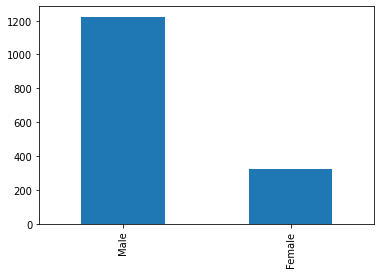

In [55]:
sex_value_count = final_dataframe['Sex'].value_counts()
print(sex_value_count)
sex_value_count.plot(kind='bar')